# <span style="color:#336699">SER-347 - Introdução à Programação para Sensoriamento Remoto</span>
<hr style="border:2px solid #0077b9;">

# <span style="color:#336699">Aula 19 - Manipulação de Dados Matriciais - Parte II</span>

[<img src="http://svn.osgeo.org/gdal/trunk/gdal/data/GDALLogoColor.svg" alt="Geospatial Data Abstraction Library " width="150" align="right">](http://www.gdal.org/)

- Thales Sehn Körting
- Gilberto Ribeiro de Queiroz
- Fabiano Morelli

In [3]:
# importar biblioteca
from osgeo import gdal

# importar constantes
from gdalconst import *

# informar o uso de exceções
gdal.UseExceptions()

# biblioteca de funções relacionadas ao sistema
# sys: System-specific parameters and functions
import sys

try:
    # criar o dataset (filename) abrindo o arquivo para leitura (GA_ReadOnly)
    filename = "imagens/crop-1-band-5.tif"
    dataset = gdal.Open(filename, GA_ReadOnly) 
except:
    print("Erro na abertura do arquivo!")

# operações no raster
# ...

# fechar o dataset e liberar memória
dataset = None 

## Operações básicas com diversas imagens

Ao trabalhar com mais de uma imagem (mais de um arquivo), é importante garantir que as informações de todas as imagens estejam compatíveis.

In [5]:
from osgeo import gdal
from gdalconst import *

# vamos abrir 4 imagens para realizar os testes
filename_crop_1_band_5 = "imagens/crop-1-band-5.tif"
filename_crop_1_band_7 = "imagens/crop-1-band-7.tif"
filename_crop_2_band_5 = "imagens/crop-2-band-5.tif"
filename_crop_2_band_7 = "imagens/crop-2-band-7.tif"

try:
    dataset_crop_1_band_5 = gdal.Open(filename_crop_1_band_5, GA_ReadOnly) 
    print (dataset_crop_1_band_5.GetGeoTransform())

    dataset_crop_1_band_7 = gdal.Open(filename_crop_1_band_7, GA_ReadOnly) 
    print (dataset_crop_1_band_7.GetGeoTransform())

    dataset_crop_2_band_5 = gdal.Open(filename_crop_2_band_5, GA_ReadOnly) 
    print (dataset_crop_2_band_5.GetGeoTransform())

    dataset_crop_2_band_7 = gdal.Open(filename_crop_2_band_7, GA_ReadOnly) 
    print (dataset_crop_2_band_7.GetGeoTransform())
except:
    print ("Erro na abertura de algum arquivo!")

(583540.0, 2.0, 0.0, 7507374.0, 0.0, -2.0)
(583540.0, 2.0, 0.0, 7507374.0, 0.0, -2.0)
(584378.0, 2.0, 0.0, 7508152.0, 0.0, -2.0)
(584378.0, 2.0, 0.0, 7508152.0, 0.0, -2.0)


In [6]:
# verificar se os crops são da mesma região, ou não
print (dataset_crop_1_band_5.GetGeoTransform() == dataset_crop_1_band_7.GetGeoTransform())
print (dataset_crop_2_band_5.GetGeoTransform() == dataset_crop_2_band_7.GetGeoTransform())
print (dataset_crop_1_band_5.GetGeoTransform() == dataset_crop_2_band_7.GetGeoTransform())

# verificar se os sistemas de coordenadas são iguais
print (dataset_crop_1_band_5.GetProjectionRef() == dataset_crop_2_band_5.GetProjectionRef())

True
True
False
True


In [7]:
# mostrar a quantidade de bandas de cada imagem
print (dataset_crop_1_band_5.RasterCount)
print (dataset_crop_1_band_7.RasterCount)
print (dataset_crop_2_band_5.RasterCount)
print (dataset_crop_2_band_7.RasterCount)

1
1
1
1


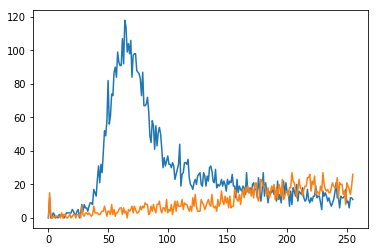

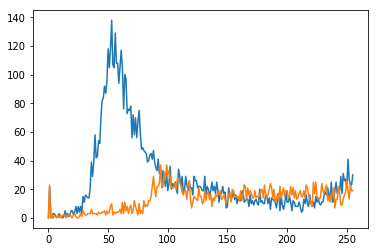

In [9]:
import matplotlib.pyplot as plt

# todas as imagens possuem uma banda cada
crop_1_band_5 = dataset_crop_1_band_5.GetRasterBand(1)
crop_1_band_7 = dataset_crop_1_band_7.GetRasterBand(1)
crop_2_band_5 = dataset_crop_2_band_5.GetRasterBand(1)
crop_2_band_7 = dataset_crop_2_band_7.GetRasterBand(1)

# verificar algumas propriedades das bandas, como o histograma
plt.plot(crop_1_band_5.GetHistogram())
plt.plot(crop_1_band_7.GetHistogram())
plt.show()
plt.plot(crop_2_band_5.GetHistogram())
plt.plot(crop_2_band_7.GetHistogram())
plt.show()

In [10]:
# para se realizar cálculos com as bandas, usamos a conversão para matriz numpy
numpy_crop_1_band_5 = crop_1_band_5.ReadAsArray()
numpy_crop_1_band_7 = crop_1_band_7.ReadAsArray()
numpy_crop_2_band_5 = crop_2_band_5.ReadAsArray()
numpy_crop_2_band_7 = crop_2_band_7.ReadAsArray()

print (numpy_crop_1_band_5.shape)
print (numpy_crop_1_band_7.shape)
print (numpy_crop_2_band_5.shape)
print (numpy_crop_2_band_7.shape)

(400, 400)
(400, 400)
(400, 400)
(400, 400)


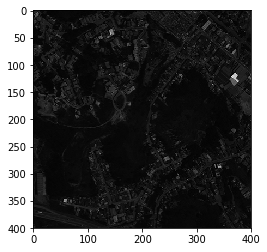

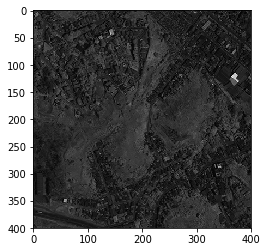

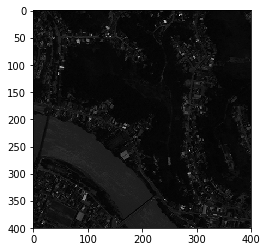

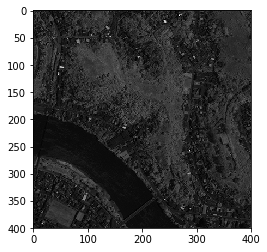

In [11]:
# para visualizar as bandas como imagens
plt.imshow(numpy_crop_1_band_5, cmap='gray')
plt.show()
plt.imshow(numpy_crop_1_band_7, cmap='gray')
plt.show()
plt.imshow(numpy_crop_2_band_5, cmap='gray')
plt.show()
plt.imshow(numpy_crop_2_band_7, cmap='gray')
plt.show()

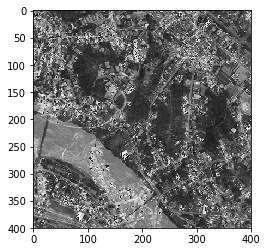

In [12]:
# as bandas representadas por matrizes numpy não possuem informações geográficas
plt.imshow(100 * (numpy_crop_1_band_5 + numpy_crop_2_band_5), cmap='gray')
plt.show()

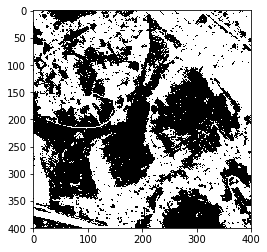

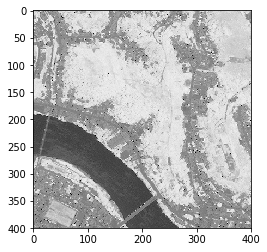

In [13]:
# criar bandas de índices de vegetação (band_5 -> red, band_7 -> ired)
crop_1_ndvi = (numpy_crop_1_band_7.astype(float) - numpy_crop_1_band_5.astype(float)) / \
              (numpy_crop_1_band_7.astype(float) + numpy_crop_1_band_5.astype(float))
plt.imshow(crop_1_ndvi < 0.5, cmap='gray')
plt.show()

crop_2_ndvi = (numpy_crop_2_band_7.astype(float) - numpy_crop_2_band_5.astype(float)) / \
              (numpy_crop_2_band_7.astype(float) + numpy_crop_2_band_5.astype(float))
plt.imshow(crop_2_ndvi, cmap='gray')
plt.show()